In [1]:
from pmdarima.arima import auto_arima
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
finalset = pd.read_csv('finalset.csv')

In [3]:
testset = finalset[finalset['store_id']==4]['amount']
testset

132    7.334286e+05
133    7.689286e+05
134    6.984286e+05
135    9.364286e+05
136    7.627143e+05
137    8.595714e+05
138    1.069857e+06
139    6.891429e+05
140    1.050143e+06
141    9.702857e+05
142    1.085171e+06
143    1.035857e+06
144    8.941429e+05
145    1.022714e+06
146    1.191429e+06
147    9.725714e+05
148    1.060571e+06
149    1.189143e+06
150    1.010143e+06
151    8.315714e+05
152    6.510000e+05
153    9.080000e+05
154    7.922143e+05
155    7.754286e+05
156    8.812857e+05
157    1.050929e+06
158    8.492857e+05
159    6.981429e+05
160    8.284286e+05
161    8.830000e+05
162    9.238571e+05
163    9.448571e+05
164    8.822857e+05
Name: amount, dtype: float64

In [21]:
model = auto_arima(testset, start_p=0, start_q=0,supress_warnings=False)
print(model.summary())

# 가장 낮은 AIC를 찾아주는 함수임

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   33
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -436.484
Date:                Tue, 12 Oct 2021   AIC                            878.969
Time:                        16:34:55   BIC                            883.459
Sample:                             0   HQIC                           880.480
                                 - 33                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   6.394e+05   1.72e+05      3.715      0.000    3.02e+05    9.77e+05
ar.L1          0.2927      0.186      1.575      0.115      -0.071       0.657
sigma2      1.767e+10      0.272   6.49e+10      0.0

/Users/jeong-giho/.conda/envs/pythonProject4/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


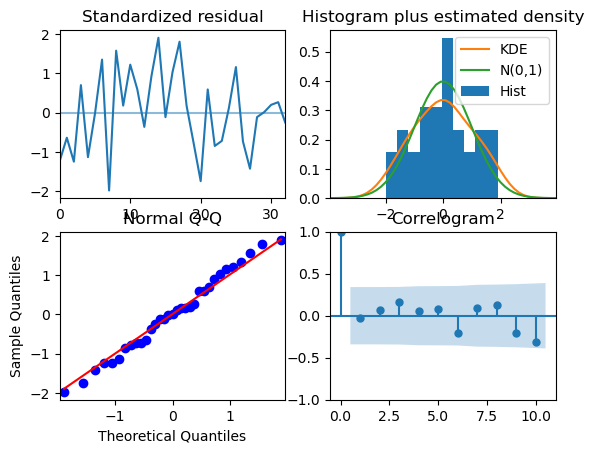

In [22]:
# 참고
# 시간 경과에 따른 표준화 잔차
# 히스토그램과 표준화 된 잔차의 추정 된 밀도, 참조를 위해 플로팅 된 정규 (0,1) 밀도
# 일반 기준선이있는 일반 QQ 플롯
# 상관도
model.plot_diagnostics()

In [16]:
print('SARIMA의 p,d,q 출력 \n',model.order)
print("p,d,q에 SARIMA의 seasonality 계절성까지 같이 추가 \n",model.seasonal_order)
print('SARIMA의 trend 검정 \n',model.trend)


SARIMA의 p,d,q 출력 
 (1, 0, 0)
p,d,q에 SARIMA의 seasonality 계절성까지 같이 추가 
 (0, 0, 0, 0)
SARIMA의 trend 검정 
 None


In [36]:
# forecast대신 predict함수를 표시함)
# n_periods=10 사용 (10이 기본값)

p_pred = model.predict(n_periods=3)
p_pred


array([897695.07590739, 902205.43514776, 903525.62874024])

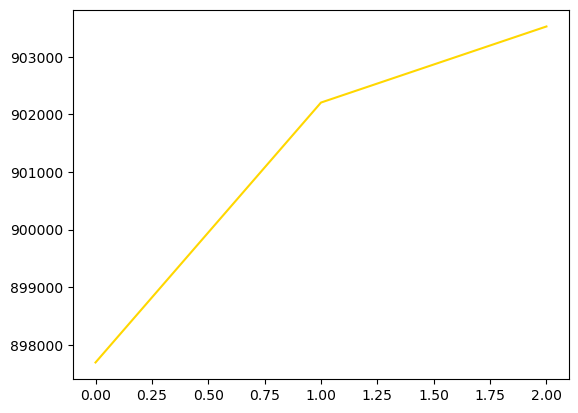

In [37]:
pred_sarima = p_pred[0].tolist()

plt.figure()
plt.plot(p_pred, color = 'gold')
plt.show()



In [44]:
# 필요한 코드


from pmdarima.arima import auto_arima
import pandas as pd

# 데이터 셋 불러옵니다.
finalset = pd.read_csv('finalset.csv')

# 스토어 id의 매출만 불러옵니다.
for i in range(3):
    testset = finalset[finalset['store_id']==i]['amount']

    # auto_arima를 시행합니다.
    model = auto_arima(testset, start_p=0, start_q=0,supress_warnings=False)

    # 3개월치 예측을 시행하고 리스트로 반환합니다.
    p_pred = model.predict(n_periods=3).tolist()
    print(p_pred)

[732559.7402597405, 732559.7402597405, 732559.7402597405]
[77428.57142857142, 77428.57142857142, 77428.57142857142]
[425686.2265683159, 425686.2265683159, 425686.2265683159]
